In [1]:
#Load data manipulation package
import numpy as np
import pandas as pd

#Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

#Data dumb store
import joblib

# 1. Business Understanding
---

- Knowing customer churn is essential for internet provider company for effectively prevent them using appropriate marketing initiative
- Internet provider company wants to give specific marketing initiative for preventing customer churn

## 1.2 Business Questions
---

- How can internet provider company develop marketing effectiveness strategy to increase reduce 30% of churn?
- What marketing initiatives are suitable to reduce the 30% customer churn?
- How to prevent unnecessary budget allocation?

## 1.3 Modelling Task
---

- Output target: **customer status of churn (categorical)**


- The goal of this project is to predict whether a customer will churn or not based on various features.
Task: **Classification task**


- We need a model that can be easily interpreted so that we can understand how each feature contributes to the prediction. This can help us gain insights into the underlying factors that influence whether a customer will churn or not.
Model used: **Logistic regression**


- We will use ROC/AUC as our evaluation metric since we want it's not influeced by imbalance target and we need to measure threshold using ROC/AUC. **Evaluation metric: ROC/AUC**

# 2. Modelling Workflow
---

## **Machine Learning Workflow** (Simplified)

### 1. <font color='blue'> Importing Data to Python:
    * Data description, Importing data, Data splitting
    
### 2. <font color='blue'> Exploratory Data Analysis:
    *Descriptive statistic, Missing value checking, Data exploration
    
### 3. <font color='blue'> Prepocessing:
    * Missing value handling, Outliers handling

### 4. <font color='blue'> Modelling:
    * Model fitting, Evaluation
    
### 5. <font color='blue'> Lift Chart & Interpretation:
    * Targetting customer churn, Coeficient interpretation

# 3. Load Data
---

- We want to describe our features and target feature
- Load the data from specific path

## 3.1 Data Description
---

The potential **predictors** for the response variable are:
1. `is_tv_subscriber`
 - `is_tv_subscriber = 0` for the customers who didn't subscribe to the TV package or only subscribe to the internet package.
  - `is_tv_subscriber = 1` for the customers who subscribe to the TV package.


2. `is_movie_package_subscriber`
  - `is_movie_package_subscriber = 0` for the customers who didn't subscribe to the movie package or only subscribe to the internet package.
  - `is_movie_package_subscriber = 1` for the customers who subscribe to the movie package.


3. `subscription_age` is the years of customer using the internet service.
4. `bill_avg` is the last three months' bill average.
5. `remaining_contract` is the year remaining for the customer's subscription contract. If null, the customer hasn't had a contract.
6. `service_failure_count` is the number of calls to the Call Center for service failure for the last three months.
7. `download_avg` is the last three months internet usage in GB.
8. `upload_avg` is the last three months upload in GB.
9. `download_over_limit` is the count of the internet usage over the customer's limit.

**Target variable**:
- `churn`
  - `churn = 0` for the customers who retain.
  - `churn = 1` for the customers who cancel their subscription before the contract ends or the customers who didn't renew their subscription after the contract ended.

## 3.2 Importing Data
---

In [2]:
X_train = joblib.load("data/raw/x_train.pkl")
y_train = joblib.load("data/raw/y_train.pkl")

# 4. Exploratory Data Analysis
---

In [3]:
# copy data
eda_x = X_train.copy()
eda_y = y_train.copy()

# concat data
eda = pd.concat([eda_x, eda_y], axis=1)

In [4]:
# sanity check
eda.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
1254,29802,0,0,3.71,13,NaN,2,0.0,0.0,0,1
64024,1544160,1,1,0.55,15,1.43,0,33.9,1.2,0,0
4931,120233,1,0,4.44,20,NaN,0,16.6,1.1,0,1
25031,620843,1,1,5.35,31,NaN,0,3.1,0.6,0,0
8610,212256,0,0,1.05,22,NaN,0,0.0,0.0,0,1


In [5]:
# Check dimension
print(eda.shape)

(49086, 11)


In [6]:
# Check missing values
eda.isna().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             14333
service_failure_count              0
download_avg                     144
upload_avg                       144
download_over_limit                0
churn                              0
dtype: int64

- We need to handle these missing values
- Since we don't have much information about these features, it will be safer to drop missing values

In [7]:
# Check duplicated
print(f"Number of duplicated data: {eda.duplicated().sum()}")

Number of duplicated data: 0


## 4.1 Descriptive Statistics
---

In [8]:
eda.describe().T

,count,mean,std,min,25%,50%,75%,max
id,49086.0,854844.133113,486811.027171,15.0,434190.75,861389.00,1275329.50,1689733.00
is_tv_subscriber,49086.0,0.825021,0.379953,0.0,1.00,1.00,1.00,1.00
is_movie_package_subscriber,49086.0,0.340382,0.473843,0.0,0.00,0.00,1.00,1.00
subscription_age,49086.0,2.485858,2.040687,0.0,0.95,1.98,3.38,12.80
bill_avg,49086.0,19.237033,13.055613,0.0,13.00,19.00,23.00,406.00
reamining_contract,34753.0,0.724484,0.694071,0.0,0.00,0.61,1.32,2.92
service_failure_count,49086.0,0.283258,0.830011,0.0,0.00,0.00,0.00,16.00
download_avg,48942.0,44.874419,65.529085,0.0,8.30,29.00,61.70,4415.20
upload_avg,48942.0,4.320277,10.119327,0.0,0.60,2.20,5.00,453.30
download_over_limit,49086.0,0.201850,0.982521,0.0,0.00,0.00,0.00,7.00


- No negative values
- It seems there are outliers in these columns: download_avg, uplaod_avg, bill_avg, subscription_age
- We need to validate it and handle it

## 4.2 Data Exploration
---

### **`is_tv_subscriber`**

In [9]:
# Describe proportion of `is_tv_subscriber`
eda['is_tv_subscriber'].value_counts(normalize=True)

1    0.825021
0    0.174979
Name: is_tv_subscriber, dtype: float64

Text(0.5, 1.0, 'is_tv_subscriber')

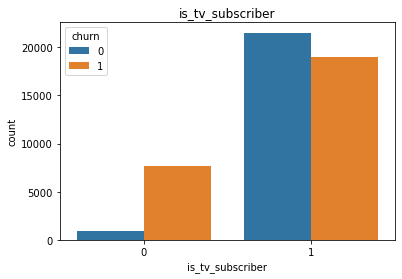

In [10]:
sns.countplot(data = eda,
             x = 'is_tv_subscriber',
             hue = eda['churn'])
plt.title('is_tv_subscriber')

- Most our customer are tv subscribers
- Even though the count of churners from TV package subscribers is higher, the higher odds of churning seem from the customers who didn't subscribe the TV package

### **`is_movie_package_subscriber`**

Text(0.5, 1.0, 'is_movie_subscriber')

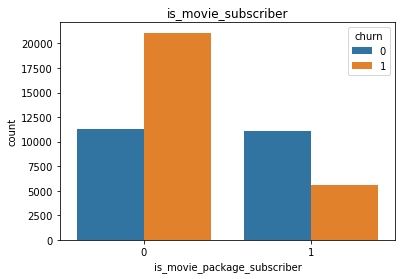

In [11]:
sns.countplot(data = eda,
              x = 'is_movie_package_subscriber', 
              hue=eda['churn'])
plt.title('is_movie_subscriber')

In [12]:
# Describe proportion of `is_tv_subscriber`
eda['is_movie_package_subscriber'].value_counts(normalize=True)

0    0.659618
1    0.340382
Name: is_movie_package_subscriber, dtype: float64

- From here, we know that our sample is dominated by customers who subscribe to the movie package, in a ration of 73:72
- The customers who didn't subscribe to the movie package has the higher odds of churning

### **`bill_avg`**

is the last 3 months bill average

In [13]:
eda['bill_avg'].describe()

count    49086.000000
mean        19.237033
std         13.055613
min          0.000000
25%         13.000000
50%         19.000000
75%         23.000000
max        406.000000
Name: bill_avg, dtype: float64

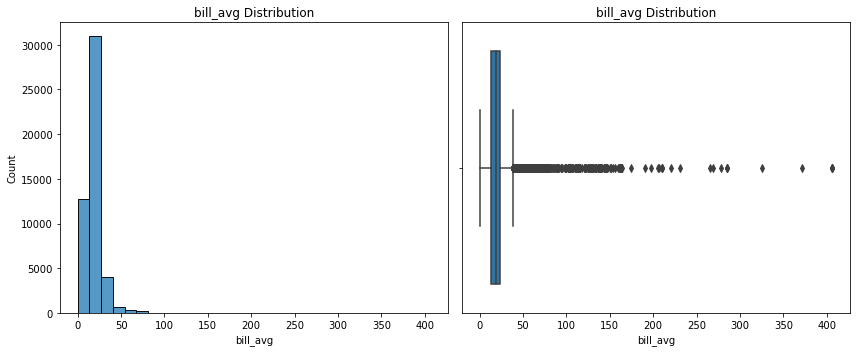

In [14]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: bill_avg distribution
sns.histplot(eda, x='bill_avg', bins=30, ax=axes[0])
axes[0].set_title('bill_avg Distribution')

# Plot 2: Boxlot
sns.boxplot(x='bill_avg', data=eda, ax=axes[1])
axes[1].set_title('bill_avg Distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# display the plots
plt.show()

- The churned and retained customers seem from the homogenous population where the average of the last three months' bills is about 19 USD
- From the boxplot we got outliers in this variable so we need to handle it 

### **`reamining_contract`**

is the year remaining for the customer's subscription contract. If null, the customer hasn't had a contract

In [15]:
eda['reamining_contract'].describe()

count    34753.000000
mean         0.724484
std          0.694071
min          0.000000
25%          0.000000
50%          0.610000
75%          1.320000
max          2.920000
Name: reamining_contract, dtype: float64

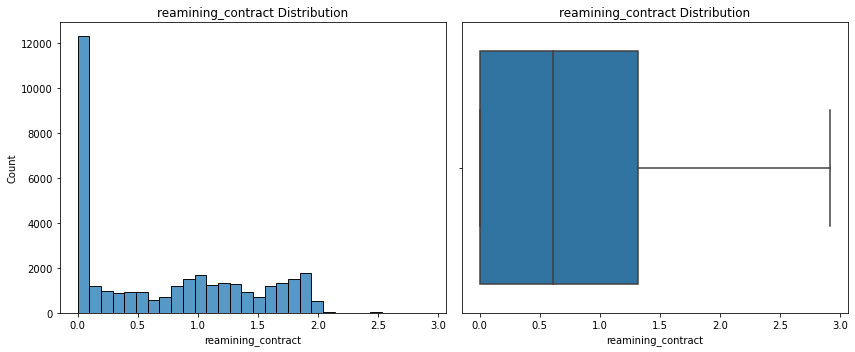

In [16]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: reamining_contract distribution
sns.histplot(eda, x='reamining_contract', bins=30, ax=axes[0])
axes[0].set_title('reamining_contract Distribution')

# Plot 2: Boxlot
sns.boxplot(x='reamining_contract', data=eda, ax=axes[1])
axes[1].set_title('reamining_contract Distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# display the plots
plt.show()

In [17]:
print(f"Number of missing values: {eda['reamining_contract'].isnull().sum()}")

Number of missing values: 14333


- Since the distribution is skew, mean imputation is not recommended to impute this feature
- And also, we dont't have musch information / subject matter expert about how to deal with this feature
- For safer step, we will drop missing values in this feature

### **`service_failure_count`**

is the number of calls to the Call Center for service failure for the last three months.

In [18]:
eda['service_failure_count'].describe()

count    49086.000000
mean         0.283258
std          0.830011
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         16.000000
Name: service_failure_count, dtype: float64

<AxesSubplot:xlabel='service_failure_count', ylabel='Count'>

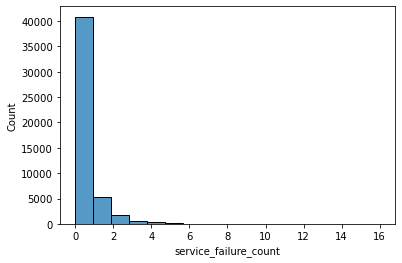

In [19]:
sns.histplot(eda['service_failure_count'])

- This distribution of this feature is skew.
- It indicates that most our customers don't use call center service for service failure last 3 months.

### **`download_avg`**

is the last 3 months internet usage in GB

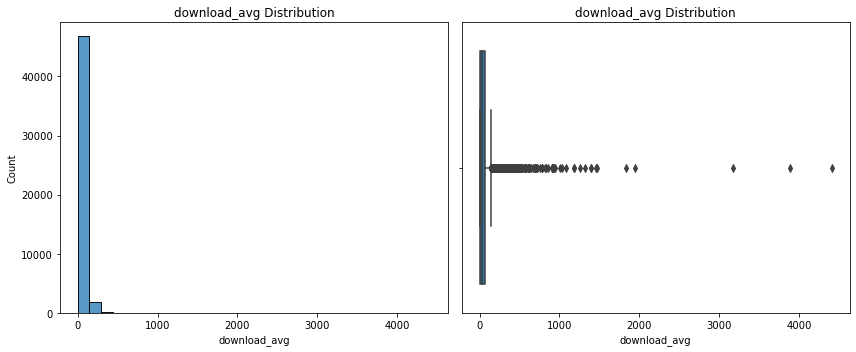

In [20]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: reamining_contract distribution
sns.histplot(eda, x='download_avg', bins=30, ax=axes[0])
axes[0].set_title('download_avg Distribution')

# Plot 2: Boxlot
sns.boxplot(x='download_avg', data=eda, ax=axes[1])
axes[1].set_title('download_avg Distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# display the plots
plt.show()

In [21]:
print(f"Number of missing values: {eda['download_avg'].isnull().sum()}")

Number of missing values: 144


- There're outliers in this feature
- We need to handle outliers in preprocessiing
- Also we need to handle missing values by dropping the missing rows

### **`upload_avg`**

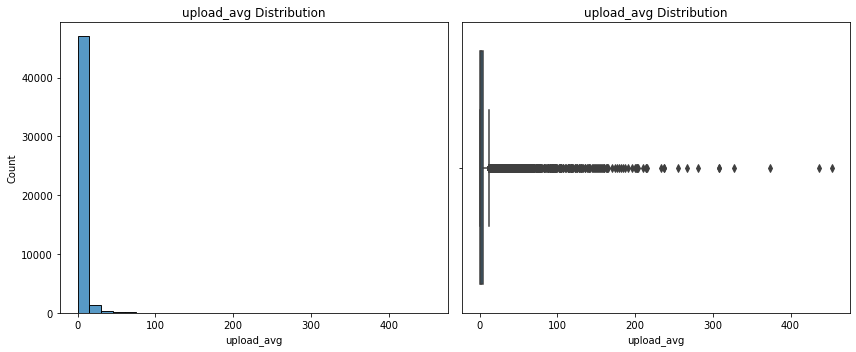

In [22]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: upload_avg¶ Distribution
sns.histplot(eda, x='upload_avg', bins=30, ax=axes[0])
axes[0].set_title('upload_avg Distribution')

# Plot 2: Boxplot
sns.boxplot(x='upload_avg', data=eda, ax=axes[1])
axes[1].set_title('upload_avg Distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [23]:
print(f"Number of missing values: {eda['upload_avg'].isnull().sum()}")

Number of missing values: 144


- There're outliers in this feature
- We need to handle outliers in preprocessiing
- Also we need to handle missing values by dropping the missing rows

### **`download_over_limit`**

is the count of the internet usage over the customers limit.

In [24]:
eda['download_over_limit'].describe()

count    49086.000000
mean         0.201850
std          0.982521
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: download_over_limit, dtype: float64

<AxesSubplot:xlabel='download_over_limit', ylabel='Count'>

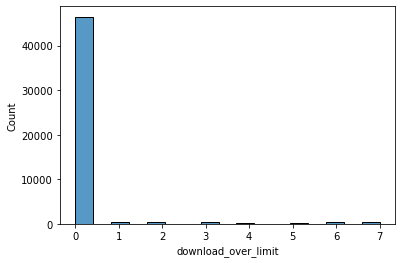

In [25]:
sns.histplot(eda['download_over_limit'])

- Most our users is not exceeding the limit of download.

### **`subscription_age`**

is the years of customer using the internet service.

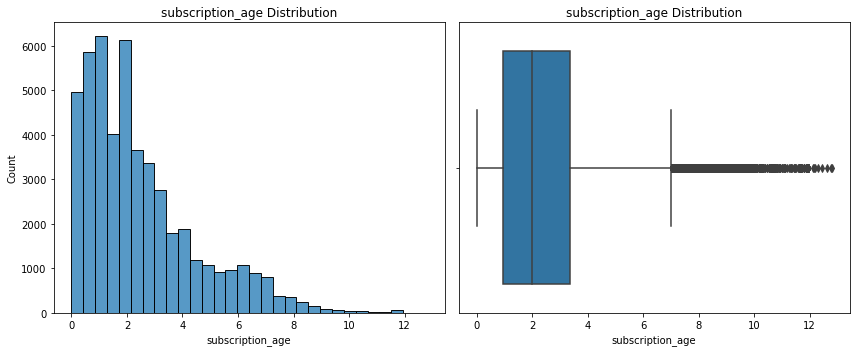

In [26]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: upload_avg¶ Distribution
sns.histplot(eda, x='subscription_age', bins=30, ax=axes[0])
axes[0].set_title('subscription_age Distribution')

# Plot 2: Boxplot
sns.boxplot(x='subscription_age', data=eda, ax=axes[1])
axes[1].set_title('subscription_age Distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

- Most of customers have subscription around 0-2 years
- There's outlier in this feature, we need to handle it

### **`churn`**

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='count'>

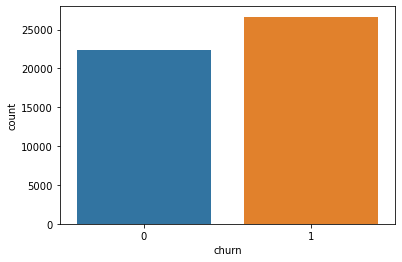

In [27]:
sns.countplot(eda['churn'])

In [28]:
eda['churn'].value_counts(normalize=True)

1    0.543271
0    0.456729
Name: churn, dtype: float64

## 4.3 Summary
---

- We need to handle outliers in 4 columns: ['bill_avg','upload_avg','download_avg','subscription_age']
- We need to drop missing values in: ['reamining_contract','download_avg','upload_avg']